# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data loading

In [3]:
df=pd.read_csv("../input/delhi-house-price-prediction/MagicBricks.csv")

In [4]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


# EDA

In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [8]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [9]:
df.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [10]:
df.shape

(1259, 11)

In [11]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [12]:
df.isna().mean()*100

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

In [13]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [14]:
df["Price"].value_counts()

15000000     30
25000000     21
30000000     21
6000000      20
20000000     20
             ..
135500000     1
8770000       1
74000000      1
120000000     1
22200000      1
Name: Price, Length: 284, dtype: int64

In [15]:
df["Price"].nunique()

284

In [16]:
df["Status"].nunique()

2

In [17]:
df["Transaction"].nunique()

2

In [18]:
df["Parking"].nunique()

9

In [19]:
df["Furnishing"].nunique()

3

In [20]:
df["Locality"].nunique()

365

In [21]:
df["Locality"].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                       

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


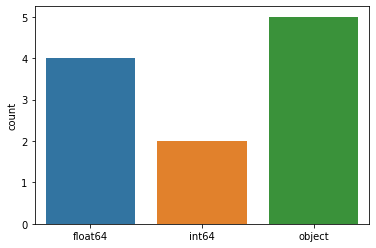

In [22]:
sns.countplot(df.dtypes.map(str))# here we can see that the count of int64 is more than the float64 and object
plt.show()

In [23]:
df.groupby("Locality").agg([np.median]).T

,Locality,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,"Vijay Enclave, Mahavir Enclave","Vijay Vihar, Rohini","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
Area,median,2700.0,1525.0,1400.0,540.0,750.0,540.0,1150.0,1360.0,750.0,1170.0,...,360.0,900.0,1100.0,825.0,1000.0,1017.0,1300.0,720.0,540.0,400.0
BHK,median,4.0,3.0,3.5,3.0,2.0,2.0,2.0,2.5,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
Bathroom,median,3.0,2.0,3.5,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
Parking,median,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,...,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
Price,median,60000000.0,14950000.0,11050000.0,4950000.0,3800000.0,3000000.0,7300000.0,17000000.0,12250000.0,7200000.0,...,2200000.0,4500000.0,22500000.0,8900000.0,4620000.0,6500000.0,15000000.0,8000000.0,1500000.0,9000000.0
Per_Sqft,median,22222.0,NaN,9655.0,19841.0,10320.0,5000.0,6347.0,12500.0,14444.0,8060.0,...,42222.0,6154.0,22000.0,8129.5,4620.0,6526.0,11538.0,10288.0,2778.0,14550.0


In [24]:
df.drop(columns="Locality",inplace=True)

In [25]:
df.shape

(1259, 10)

In [26]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [27]:
df["BHK"].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10])

In [28]:
df["BHK"].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64

In [29]:
import warnings
warnings.filterwarnings("ignore")

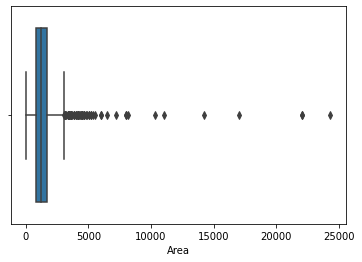

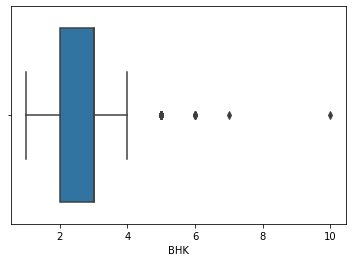

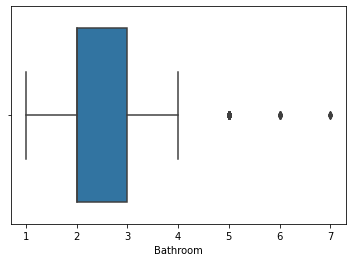

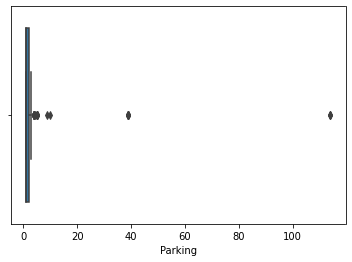

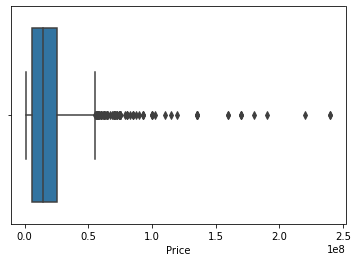

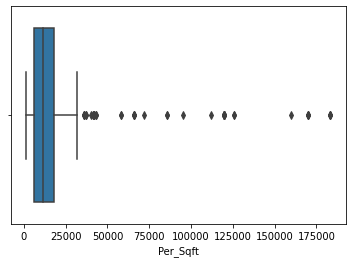

In [30]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.boxplot(df[i])
plt.show()

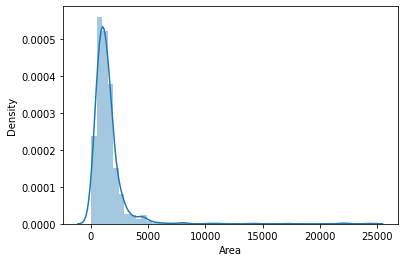

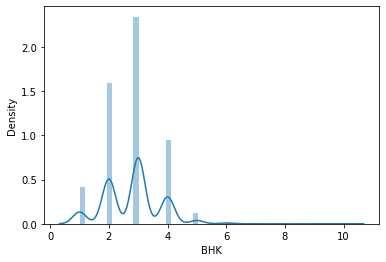

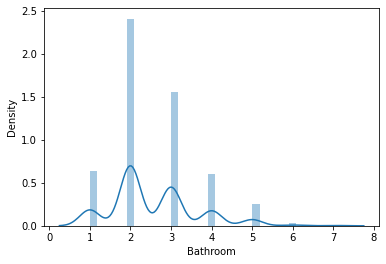

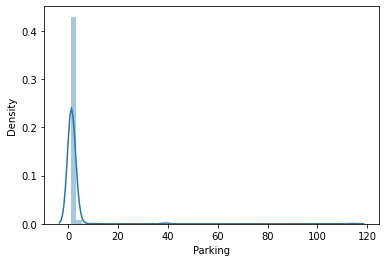

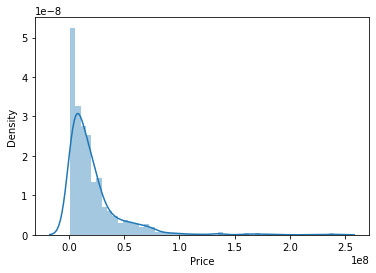

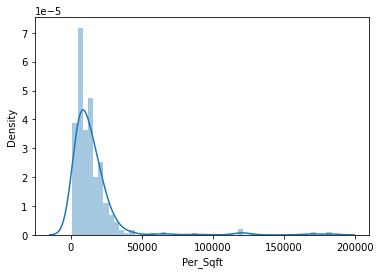

In [31]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.distplot(df[i])
plt.show()

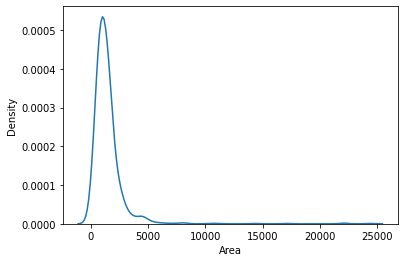

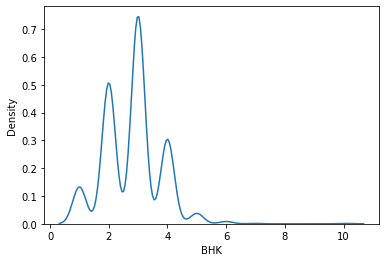

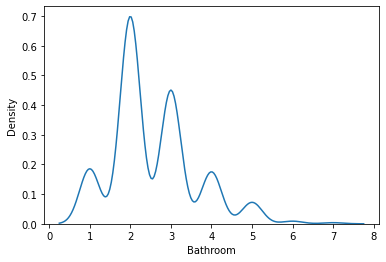

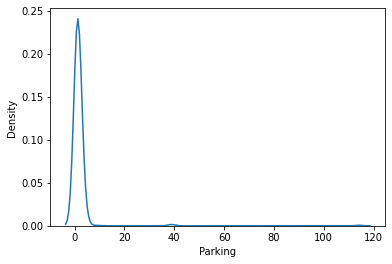

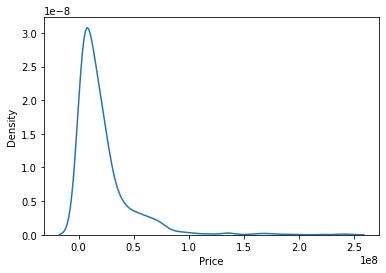

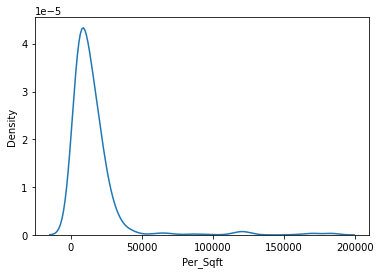

In [32]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.kdeplot(df[i])
plt.show()

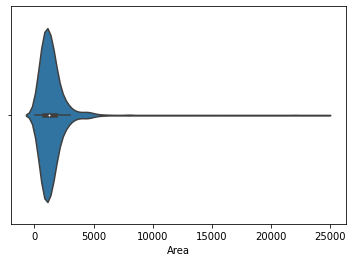

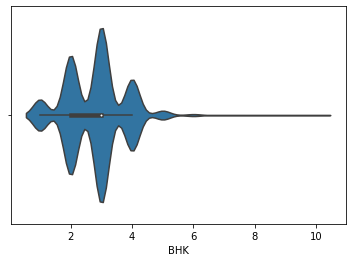

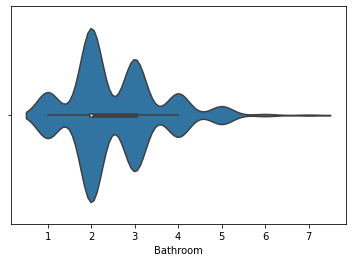

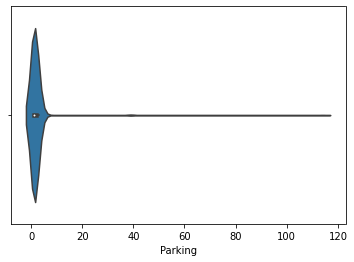

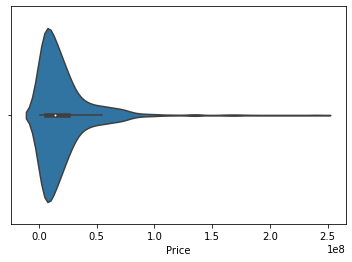

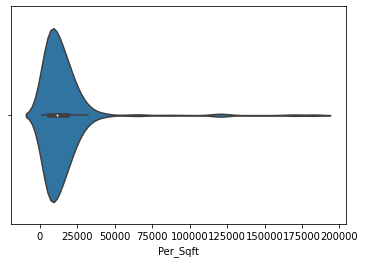

In [33]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.violinplot(df[i])
plt.show()

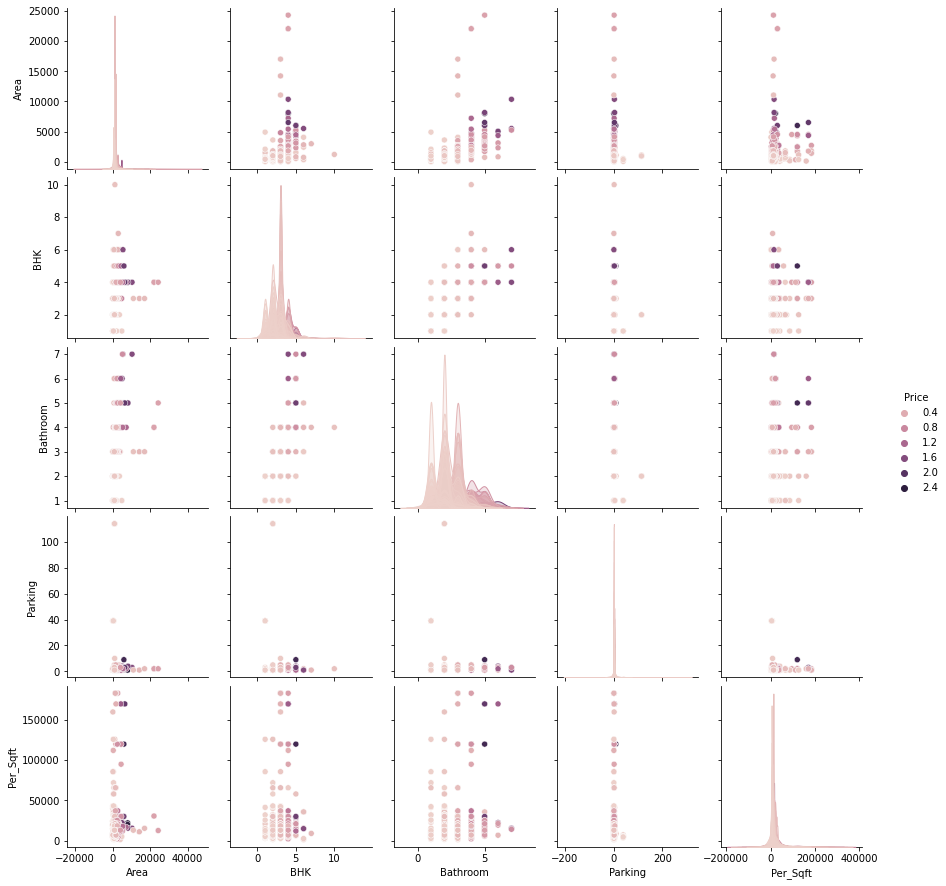

In [34]:
sns.pairplot(df,hue="Price")

In [35]:
df.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


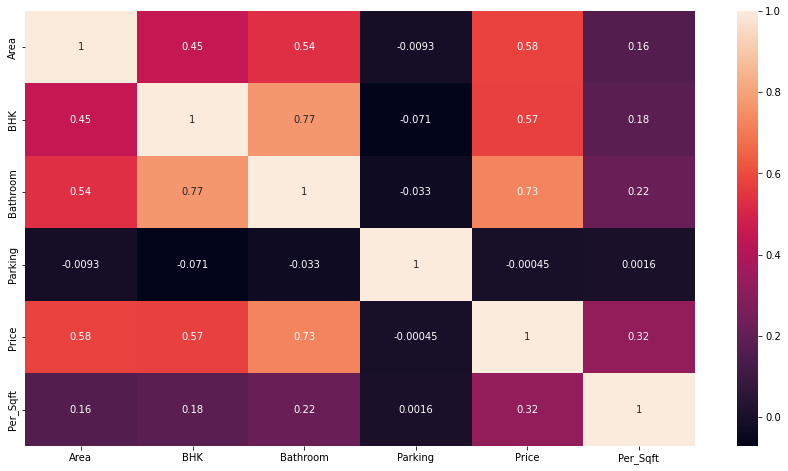

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

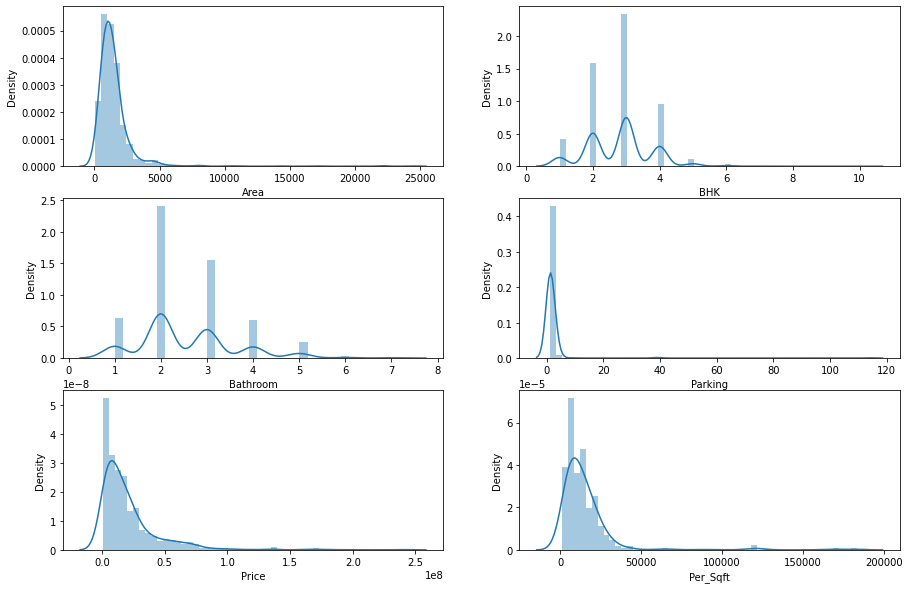

In [37]:
count=1
plt.subplots(figsize=(15,10))
for i in df.columns:
    if df[i].dtypes!="object":
        plt.subplot(3,2,count)
        sns.distplot(df[i])
        count+=1
plt.show()


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [39]:
df.fillna(method="bfill",inplace=True)

In [40]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing       int64
Parking        float64
Price            int64
Status           int64
Transaction      int64
Type             int64
Per_Sqft       float64
dtype: object

In [41]:
x=df.drop('Price',axis=1)
y=df['Price']

In [42]:
x.shape

(1259, 9)

In [43]:
y.shape

(1259,)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train


,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft
243,4300.0,4,4.0,2,2.0,1,1,1,120000.0
514,504.0,3,1.0,1,1.0,1,1,0,7143.0
966,1000.0,3,2.0,0,2.0,1,1,0,9655.0
199,1295.0,3,2.0,1,1.0,1,0,0,6875.0
270,2650.0,4,4.0,2,2.0,1,0,1,20000.0
...,...,...,...,...,...,...,...,...,...
1044,1200.0,3,2.0,1,1.0,1,1,1,7290.0
1095,1350.0,3,3.0,2,2.0,1,1,0,12307.0
1130,1000.0,2,2.0,1,1.0,1,1,0,7800.0
860,565.0,2,2.0,2,1.0,1,1,1,5820.0


In [46]:
y_train

243      60000000
514       3600000
966      12000000
199      10000000
270      75000000
          ...    
1044     14500000
1095     20000000
1130      7800000
860       3500000
1126    115000000
Name: Price, Length: 1007, dtype: int64

In [47]:
x_test

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft
76,1620.0,3,2.0,1,1.0,1,1,0,3524.0
1026,1775.0,3,3.0,1,1.0,0,0,0,14366.0
43,1130.0,2,2.0,2,1.0,1,1,1,14444.0
666,2500.0,4,4.0,1,2.0,1,1,0,21000.0
529,50.0,2,1.0,1,1.0,1,0,0,6667.0
...,...,...,...,...,...,...,...,...,...
430,100.0,3,2.0,1,2.0,1,1,0,160000.0
32,900.0,2,2.0,2,1.0,1,0,1,14444.0
156,450.0,1,1.0,0,1.0,1,1,1,4444.0
376,500.0,2,1.0,1,1.0,1,1,1,32000.0


In [48]:
y_test

76      14900000
1026    25500000
43       7800000
666     52500000
529      1950000
          ...   
430     16000000
32      10500000
156      2000000
376      3700000
620      6300000
Name: Price, Length: 252, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [50]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([1.49900000e+07, 2.55000000e+07, 1.69400000e+07, 5.14400000e+07,
       3.37000000e+06, 2.98166667e+07, 5.91500000e+07, 1.10750000e+08,
       2.18000000e+06, 2.35200000e+07, 1.33740000e+07, 3.61000000e+06,
       5.32500000e+07, 9.35000000e+06, 1.35700000e+07, 4.18000000e+07,
       2.21000000e+06, 1.22000000e+07, 4.65600000e+06, 1.34000000e+07,
       6.36000000e+06, 4.93300000e+06, 1.53000000e+07, 2.90000000e+06,
       1.96500000e+07, 3.85600000e+07, 3.74000000e+07, 1.88000000e+07,
       1.40000000e+07, 4.12000000e+06, 7.34000000e+06, 7.90000000e+06,
       1.72900000e+07, 4.12500000e+06, 2.24500000e+07, 1.93500000e+06,
       6.35000000e+07, 7.35000000e+06, 3.98000000e+06, 1.87800000e+07,
       1.13000000e+07, 4.20000000e+06, 2.35000000e+07, 6.10000000e+07,
       1.55800000e+07, 1.44100000e+07, 3.19500000e+07, 7.22200000e+06,
       5.45000000e+06, 6.92000000e+07, 6.41500000e+07, 5.95500000e+07,
       1.07300000e+07, 1.93380000e+07, 3.81500000e+06, 1.50010000e+07,
      

In [51]:
#display adjusted R-squared
a_r_s=(1 - (1-rf.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))*100
print('adjusted R-squared:', a_r_s)

adjusted R-squared: 92.32983860238775


In [52]:
result=rf.predict(np.array([[800,3,2,1,1,0,1,1,6667]]))
result

array([8167000.])

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [54]:
#display adjusted R-squared
a_r_s=(1 - (1-neigh.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))*100
print('adjusted R-squared:', a_r_s)

adjusted R-squared: 88.60549109355216


In [55]:
result=rf.predict(np.array([[650,2,2,1,1,0,1,1,6667]]))
result

array([8520000.])

the prediction is correct ,you can check by keep different features in the above code